In [ ]:
# In this Project, we will use Netflix updated Dataset, for creating 3 different products.
# 1) Reccomendation System
# 2) Rating Classifier
# 3) Multilabel Classifier

In [ ]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx  #for text cleaning purpose

In [ ]:
#getting ML-NLP pipelines
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline

In [ ]:
#importing ML Estimators
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Loading Dataset
df=pd.read_csv("netflix_titles.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
cols = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
         'rating', 'duration', 'listed_in', 'description']

for col in cols:
    df[col] = df[col].str.lower()

In [ ]:
# #Lets do some EDA
# 1) Release year:
#    How much movies per year
#    Which year has highest movies released
#    Director and movies they release per year

# 2) Title:
#    Keywords in Titles
#    Most common keywords in Title
#    Word count of all titles
#    Longest and shortest title
#    Reccomendor using title

# 3) Cast:
#    Number of cast per movie
#    Most casted Actor/Actress

# 4) Duration:
#    Average Duration
#    Min and Max Duration

# 5) Description:
#    NER of Description
#    KE most of Description
#    SA of Description

In [ ]:
# Reccomendation System using Movie Title

In [ ]:
# Text Classifier Product/System
# Title + Rating , Title + Listed in
# Desc + Rating , Desc + Listed in

In [ ]:
# Multi-label Text Classifier Product/System
# Title + Listed in
# Desc + Listed in

In [ ]:
#Cleaning title column

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['title']=df['title'].str.lower().apply(lambda x: nfx.remove_special_characters(x))
df['title']=df['title'].str.lower().apply(lambda x: nfx.remove_stopwords(x))

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,movie,dick johnson dead,kirsten johnson,NaN,united states,"september 25, 2021",2020,pg-13,90 min,documentaries,"as her father nears the end of his life, filmm..."
1,s2,tv show,blood water,NaN,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,"september 24, 2021",2021,tv-ma,2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t..."
2,s3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",NaN,"september 24, 2021",2021,tv-ma,1 season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...
3,s4,tv show,jailbirds new orleans,NaN,NaN,NaN,"september 24, 2021",2021,tv-ma,1 season,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo..."
4,s5,tv show,kota factory,NaN,"mayur more, jitendra kumar, ranjan raj, alam k...",india,"september 24, 2021",2021,tv-ma,2 seasons,"international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...


In [ ]:
#Converting text->vectors
cv=CountVectorizer()

In [ ]:
vct=cv.fit_transform(df['title'])

In [ ]:
vct

<8807x8830 sparse matrix of type '<class 'numpy.int64'>'
	with 19701 stored elements in Compressed Sparse Row format>

In [ ]:
vct.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
cv.vocabulary_

{'dick': 2209,
 'johnson': 4106,
 'dead': 2045,
 'blood': 1012,
 'water': 8534,
 'ganglands': 3065,
 'jailbirds': 4004,
 'new': 5581,
 'orleans': 5806,
 'kota': 4448,
 'factory': 2690,
 'midnight': 5217,
 'mass': 5055,
 'little': 4695,
 'pony': 6208,
 'generation': 3113,
 'sankofa': 6942,
 'great': 3290,
 'british': 1172,
 'baking': 684,
 'starling': 7556,
 'vendetta': 8375,
 'truth': 8152,
 'lies': 4648,
 'mafia': 4871,
 'bangkok': 718,
 'breaking': 1145,
 'je': 4038,
 'suis': 7671,
 'karl': 4248,
 'confessions': 1753,
 'invisible': 3926,
 'girl': 3172,
 'crime': 1882,
 'stories': 7603,
 'india': 3839,
 'detectives': 2159,
 'dear': 2054,
 'white': 8596,
 'people': 6050,
 'europes': 2615,
 'dangerous': 1992,
 'man': 4943,
 'otto': 5822,
 'skorzeny': 7346,
 'spain': 7467,
 'falsa': 2707,
 'identidad': 3774,
 'intrusion': 3916,
 'jaguar': 4000,
 'monsters': 5358,
 'inside': 3886,
 '24': 65,
 'faces': 2685,
 'billy': 937,
 'milligan': 5235,
 'resurrection': 6625,
 'ertugrul': 2583,
 'avva

In [ ]:
cv.get_feature_names_out()

array(['009', '10', '100', ..., 'zulu', 'zumbos', 'zz'], dtype=object)

In [ ]:
#cosine matrix
from sklearn.metrics.pairwise import cosine_similarity
cmat=cosine_similarity(vct)

In [ ]:
cmat

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#Indices of Movies title
mind=pd.Series(df.index,index=df['title']).drop_duplicates()

In [ ]:
mind

title
dick johnson dead           0
blood water                 1
ganglands                   2
jailbirds new orleans       3
kota factory                4
                         ... 
zodiac                   8802
zombie dumb              8803
zombieland               8804
zoom                     8805
zubaan                   8806
Length: 8807, dtype: int64

In [ ]:
idx=mind['kota factory']  #manually checking if function works

In [ ]:
idx

4

In [ ]:
sim_score=list(enumerate(cmat[idx]))

In [ ]:
sim_score

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.9999999999999998),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 0.0),
 (77, 0.0),
 (78, 0.0),
 (79, 0.0),
 (80, 0.0),
 (81, 0.0),
 (82, 0.0),

In [ ]:
sss=sorted(sim_score,key=lambda x: x[1],reverse=True)

In [ ]:
sss #similarity score of index=4, movie=kota factory, with different indices values..

[(4, 0.9999999999999998),
 (3567, 0.4999999999999999),
 (4569, 0.4999999999999999),
 (6446, 0.408248290463863),
 (7275, 0.408248290463863),
 (3535, 0.35355339059327373),
 (8745, 0.35355339059327373),
 (0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68,

In [ ]:
smindx=[i[0] for i in sss[1:]]
smscrs=[i[1] for i in sss[1:]]

In [ ]:
res=df.iloc[smindx]  #movie similar to kota factory

In [ ]:
res['sim_score']=smscrs

<ipython-input-40-6fd62e6a2973>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['sim_score']=smscrs


In [ ]:
res[['title','sim_score']]

,title,sim_score
3567,american factory,0.500000
4569,harishchandrachi factory,0.500000
6446,charlie chocolate factory,0.408248
7275,leapfrog letter factory,0.408248
3535,american factory conversation obamas,0.353553
...,...,...
8802,zodiac,0.000000
8803,zombie dumb,0.000000
8804,zombieland,0.000000
8805,zoom,0.000000


In [ ]:
res

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,sim_score
3567,s3568,movie,american factory,"steven bognar, julia reichert",NaN,united states,"august 21, 2019",2019,tv-14,110 min,documentaries,"in this documentary, hopes soar when a chinese...",0.500000
4569,s4570,movie,harishchandrachi factory,paresh mokashi,"nandu madhav, vibhawari deshpande, ambarish de...",india,"october 1, 2018",2009,tv-pg,99 min,"dramas, international movies",against a backdrop of burgeoning social unrest...,0.500000
6446,s6447,movie,charlie chocolate factory,tim burton,"johnny depp, freddie highmore, david kelly, he...","united kingdom, united states","january 1, 2020",2005,pg,115 min,"children & family movies, comedies",the eccentric willy wonka opens the doors of h...,0.408248
7275,s7276,movie,leapfrog letter factory,roy allen smith,"joey camen, marie danielle, mark cacciatore, d...",united states,"april 15, 2020",2003,tv-y,37 min,children & family movies,in this entertaining installment of the wildly...,0.408248
3535,s3536,movie,american factory conversation obamas,NaN,"president barack obama, michelle obama, julia ...",united states,"september 5, 2019",2019,tv-g,10 min,documentaries,barack and michelle obama talk with directors ...,0.353553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,movie,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...",united states,"november 20, 2019",2007,r,158 min,"cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a...",0.000000
8803,s8804,tv show,zombie dumb,NaN,NaN,NaN,"july 1, 2019",2018,tv-y7,2 seasons,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g...",0.000000
8804,s8805,movie,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",united states,"november 1, 2019",2009,r,88 min,"comedies, horror movies",looking to survive in a world taken over by zo...,0.000000
8805,s8806,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,"january 11, 2020",2006,pg,88 min,"children & family movies, comedies","dragged from civilian life, a former superhero...",0.000000


In [ ]:
def get_recom(title,cmat,num_of_rec=10):
  mind=pd.Series(df.index,index=df['title']).drop_duplicates()
  idx=mind[title]
  sim_score=list(enumerate(cmat[idx]))
  sss=sorted(sim_score,key=lambda x: x[1],reverse=True)
  smindx=[i[0] for i in sss[1:]]
  smscrs=[i[1] for i in sss[1:]]
  res=df.iloc[smindx]
  res['sim_score']=smscrs
  df_final=res[['title','sim_score','cast','description','release_year']]
  return df_final.head(num_of_rec)

In [ ]:
df.iloc[203]

show_id                                                      s204
type                                                        movie
title                                        kyaa kool hain hum 3
director                                             umesh ghadge
cast            tusshar kapoor, aftab shivdasani, krishna abhi...
country                                                     india
date_added                                        august 27, 2021
release_year                                                 2016
rating                                                      tv-ma
duration                                                  124 min
listed_in                          comedies, international movies
description     when an unlikely porn actor falls for a woman ...
Name: 203, dtype: object

In [ ]:
def prpcs(docx):
  rs=nfx.remove_stopwords(nfx.remove_special_characters(docx.lower()))
  return rs

In [ ]:
ex=prpcs(df.iloc[203].title)

In [ ]:
ex

'kyaa kool hain hum 3'

In [ ]:
get_recom(ex,cmat)

<ipython-input-43-357b5bec15f6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['sim_score']=smscrs


,title,sim_score,cast,description,release_year
204,kyaa super kool hain hum,0.894427,"tusshar kapoor, riteish deshmukh, anupam kher,...",an aspiring actor and a struggling dj team up ...,2012
202,kyaa kool hai hum,0.750000,"tusshar kapoor, riteish deshmukh, isha koppika...",longtime friends rahul and karan head to mumba...,2005
7022,hum saathsaath hain,0.577350,"salman khan, karisma kapoor, saif ali khan, ta...",a scheming matriarch plots to cut off her disa...,1999
2957,hum aapke hain koun,0.500000,"madhuri dixit, salman khan, mohnish bahl, renu...","although nisha falls for prem, she agrees to m...",1994
5296,ek jaan hain hum,0.500000,"rajiv kapoor, divya rana, shammi kapoor, tanuj...",while trying to win over his beloved’s parents...,1983
6993,hope aur hum,0.288675,"naseeruddin shah, kabir sajid, sonali kulkarni...",a multigenerational household navigates daily ...,2018
0,dick johnson dead,0.000000,NaN,"as her father nears the end of his life, filmm...",2020
1,blood water,0.000000,"ama qamata, khosi ngema, gail mabalane, thaban...","after crossing paths at a party, a cape town t...",2021
2,ganglands,0.000000,"sami bouajila, tracy gotoas, samuel jouy, nabi...",to protect his family from a powerful drug lor...,2021
3,jailbirds new orleans,0.000000,NaN,"feuds, flirtations and toilet talk go down amo...",2021


In [ ]:
#we have succesfully created a Product "Reccomendation System" based on Title, we can do it using description as well(it will be a good practice)

In [ ]:
# 2nd Product:
# Multi text Classifier, Title+Rating/Desc+Rating

In [ ]:
df2=df.copy()

In [ ]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,movie,dick johnson dead,kirsten johnson,NaN,united states,"september 25, 2021",2020,pg-13,90 min,documentaries,"as her father nears the end of his life, filmm..."
1,s2,tv show,blood water,NaN,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,"september 24, 2021",2021,tv-ma,2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t..."
2,s3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",NaN,"september 24, 2021",2021,tv-ma,1 season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...
3,s4,tv show,jailbirds new orleans,NaN,NaN,NaN,"september 24, 2021",2021,tv-ma,1 season,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo..."
4,s5,tv show,kota factory,NaN,"mayur more, jitendra kumar, ranjan raj, alam k...",india,"september 24, 2021",2021,tv-ma,2 seasons,"international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...


In [ ]:
df2.dropna(inplace=True)

In [ ]:
#Plotting rating vs title
df2['rating'].unique()

array(['tv-ma', 'tv-14', 'pg-13', 'pg', 'r', 'tv-pg', 'g', 'tv-y7',
       'tv-g', 'tv-y', 'nc-17', 'nr', 'tv-y7-fv', 'ur'], dtype=object)

In [ ]:
df2['rating'].replace({"pg-13":"pg","tv-pg":"pg","r":"others","g":"others","nr":"others","tv-y7":"others","tv-g":"others","tv-y":"others","nc-17":"others","tv-y7-fv":"others","ur":"others"},inplace=True)

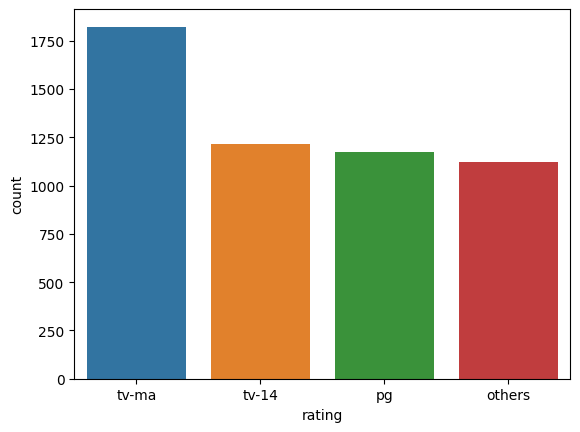

In [ ]:
sns.countplot(x='rating',data=df2)
plt.show()

In [ ]:
#trying pipeline approach,
# Transformers + Estimators

In [ ]:
Xfeat=df2['title']
ylabel=df2['rating']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(Xfeat,ylabel,test_size=0.25,random_state=40)

In [ ]:
pipe_lr=Pipeline(steps=[('cv',CountVectorizer(binary=True,max_features=50000))
, ('lr',LogisticRegression(C=0.001, penalty='l2', max_iter=100, random_state=70))])
pipe_nb=Pipeline(steps=[('cv',CountVectorizer()),('lr',MultinomialNB())])
#trying for both Logistic regression and Naive Bayes

In [ ]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer(binary=True, max_features=50000)),
                ('lr', LogisticRegression(C=0.001, random_state=70))])

In [ ]:
pipe_nb

Pipeline(steps=[('cv', CountVectorizer()), ('lr', MultinomialNB())])

In [ ]:
pipe_lr.steps

[('cv', CountVectorizer(binary=True, max_features=50000)),
 ('lr', LogisticRegression(C=0.001, random_state=70))]

In [ ]:
pipe_lr.get_params()

{'memory': None,
 'steps': [('cv', CountVectorizer(binary=True, max_features=50000)),
  ('lr', LogisticRegression(C=0.001, random_state=70))],
 'verbose': False,
 'cv': CountVectorizer(binary=True, max_features=50000),
 'lr': LogisticRegression(C=0.001, random_state=70),
 'cv__analyzer': 'word',
 'cv__binary': True,
 'cv__decode_error': 'strict',
 'cv__dtype': numpy.int64,
 'cv__encoding': 'utf-8',
 'cv__input': 'content',
 'cv__lowercase': True,
 'cv__max_df': 1.0,
 'cv__max_features': 50000,
 'cv__min_df': 1,
 'cv__ngram_range': (1, 1),
 'cv__preprocessor': None,
 'cv__stop_words': None,
 'cv__strip_accents': None,
 'cv__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cv__tokenizer': None,
 'cv__vocabulary': None,
 'lr__C': 0.001,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 70,
 'lr__solver': 'lbfgs

In [ ]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(binary=True, max_features=50000)),
                ('lr', LogisticRegression(C=0.001, random_state=70))])

In [ ]:
df2.dropna(inplace=True)

In [ ]:
#Accuracy check up!
pipe_lr.score(X_test,y_test)  #getting 34% accuracy

0.33158289572393096

In [ ]:
#Now lets try Convolutional Neural Network for predictions, using LSTM as well

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=7b813681ec647bf8c650107075a2b9d9f466855a3ac998cf2481aa1609828779
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

In [ ]:
data=df2.copy()

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,movie,sankofa,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","united states, ghana, burkina faso, united kin...","september 24, 2021",1993,tv-ma,125 min,"dramas, independent movies, international movies","on a photo shoot in ghana, an american model s..."
8,s9,tv show,great british baking,andy devonshire,"mel giedroyc, sue perkins, mary berry, paul ho...",united kingdom,"september 24, 2021",2021,tv-14,9 seasons,"british tv shows, reality tv",a talented batch of amateur bakers face off in...
9,s10,movie,starling,theodore melfi,"melissa mccarthy, chris o'dowd, kevin kline, t...",united states,"september 24, 2021",2021,pg,104 min,"comedies, dramas",a woman adjusting to life after a loss contend...
12,s13,movie,je suis karl,christian schwochow,"luna wedler, jannis niewöhner, milan peschel, ...","germany, czech republic","september 23, 2021",2021,tv-ma,127 min,"dramas, international movies",after most of her family is murdered in a terr...
24,s25,movie,jeans,s. shankar,"prashanth, aishwarya rai bachchan, sri lakshmi...",india,"september 21, 2021",1998,tv-14,166 min,"comedies, international movies, romantic movies",when the father of the man she loves insists t...


In [ ]:
MAX_NB_WORDS = 50000
# Max number of words in each description.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15230 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(data['description'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (5332, 250)


In [ ]:
Y = pd.get_dummies(data['rating']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (5332, 4)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3732, 250) (3732, 4)
(1600, 250) (1600, 4)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(500, dropout=0.4, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 250, 100)          0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 500)               1202000   
                                                                 
 dense_1 (Dense)             (None, 4)                 2004      
                                                                 
Total params: 6204004 (23.67 MB)
Trainable params: 6204004 (23.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
53/53 [==============================] - 85s 1s/step - loss: 1.3681 - accuracy: 0.3398 - val_loss: 1.3676 - val_accuracy: 0.3262
Epoch 2/5
53/53 [==============================] - 66s 1s/step - loss: 1.3709 - accuracy: 0.3556 - val_loss: 1.3591 - val_accuracy: 0.3289
Epoch 3/5
53/53 [==============================] - 63s 1s/step - loss: 1.2293 - accuracy: 0.4425 - val_loss: 1.3456 - val_accuracy: 0.3449
Epoch 4/5
53/53 [==============================] - 62s 1s/step - loss: 0.9574 - accuracy: 0.6248 - val_loss: 1.4190 - val_accuracy: 0.3583
Epoch 5/5
53/53 [==============================] - 63s 1s/step - loss: 0.6214 - accuracy: 0.7880 - val_loss: 1.6446 - val_accuracy: 0.3128


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

50/50 [==============================] - 4s 73ms/step - loss: 1.6740 - accuracy: 0.3137
Test set
  Loss: 1.674
  Accuracy: 0.314


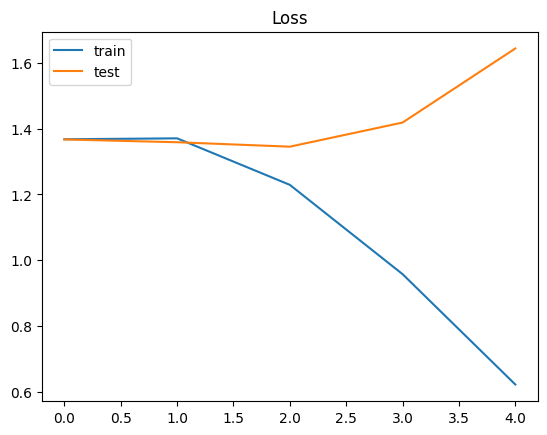

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

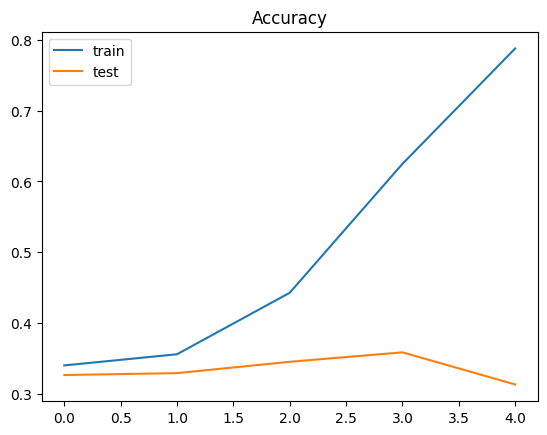

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
data.rating.unique()

array(['tv-ma', 'tv-14', 'pg', 'others'], dtype=object)

In [ ]:
new_desc = ["This documentary starts with Alex Lewis, who gets into a motorcycle accident and wakes up in the hospital not knowing who he is. He doesn’t remember anything (not even what a bicycle or a TV is, or who his mother or father are), but he remembers his twin brother, Marcus. When Alex gets back into his childhood home, he’s full of questions, and Marcus is full of answers. However, slowly, Marcus realizes his power to reshape Alex’s version of their past. Marcus leaves one important detail from Alex’s life that makes this documentary (as if it wasn’t already) such an insane story. I know I said it’s a sad movie, but it’s also fascinating and, ultimately, humanizing of the brothers’ experience."]
seq = tokenizer.texts_to_sequences(new_desc)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['tv-ma', 'tv-14', 'pg', 'others']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 150ms/step
[[0.39259276 0.01203243 0.22000372 0.37537116]] tv-ma


In [ ]:
#due to data imbalance, test accuracy is no upto mark.